In [1]:
# Dependencies
import us
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
#import gmaps
import scipy.stats as st
#import geopandas as gpd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Import census api key
census_key = os.environ.get('census_api_key')
c = Census(census_key, year = 2016)

# Import Google API key
# g_key = os.environ.get('g_key')

In [2]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
ed_data = c.acs5.get(('B01003_001E', 'B15003_017E', 
                      'B15003_018E', 'B15003_021E', 'B15003_022E',
                      'B15003_023E', 'B15003_024E', 'B15003_025E',
                      'B23025_005E'), {'for': 'zip code tabulation area:*'})
# Convert to DataFrame
ed_df = pd.DataFrame(ed_data)
ed_df

,B01003_001E,B15003_017E,B15003_018E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,B23025_005E,zip code tabulation area
0,1483.0,339.0,54.0,78.0,91.0,53.0,0.0,42.0,68.0,15952
1,273.0,100.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,15953
2,2179.0,689.0,72.0,158.0,132.0,57.0,0.0,0.0,72.0,15954
3,2647.0,883.0,52.0,212.0,206.0,55.0,29.0,0.0,85.0,15955
4,2483.0,795.0,84.0,242.0,113.0,22.0,7.0,6.0,96.0,15956
...,...,...,...,...,...,...,...,...,...,...
33115,6458.0,1050.0,377.0,521.0,876.0,320.0,49.0,50.0,274.0,97760
33116,4537.0,499.0,174.0,178.0,145.0,67.0,0.0,0.0,451.0,97761
33117,21243.0,2709.0,1474.0,1762.0,1568.0,728.0,181.0,102.0,1052.0,97801
33118,758.0,113.0,21.0,52.0,122.0,19.0,1.0,0.0,12.0,97810


In [3]:
# Column Reordering
ed_df = ed_df.rename(columns={"B01003_001E": "Population",
                              'B15003_017E': 'High_School',
                              'B15003_018E': 'GED',
                              'B15003_021E': 'Associates',
                              'B15003_022E': 'Bachelors',
                              'B15003_023E': 'Masters',
                              'B15003_024E': 'Professional',
                              'B15003_025E': 'Doctorate',
                              'zip code tabulation area': 'Zip'})

ed_df.head()

# Add in percentages 

ed_df['High_School%'] = round(((ed_df['High_School'].astype(int) / ed_df["Population"].astype(int))*100),1)
ed_df['GED%'] = round(((ed_df['GED'].astype(int) / ed_df["Population"].astype(int))*100),1)
ed_df['Associates%'] = round(((ed_df['Associates'].astype(int) / ed_df["Population"].astype(int))*100),1)
ed_df['Bachelors%'] = round(((ed_df['Bachelors'].astype(int) / ed_df["Population"].astype(int))*100),1)
ed_df['Masters%'] = round(((ed_df['Masters'].astype(int) / ed_df["Population"].astype(int))*100),1)
ed_df['Professional%'] = round(((ed_df['Professional'].astype(int) / ed_df["Population"].astype(int))*100),1)
ed_df['Doctorate%'] = round(((ed_df['Doctorate'].astype(int) / ed_df["Population"].astype(int))*100),1)

ed_df['Educated%'] = (ed_df['High_School%'] +
                         ed_df['GED%'] +
                         ed_df['Associates%'] +
                         ed_df['Bachelors%'] +
                         ed_df['Masters%'] +
                         ed_df['Professional%'] +
                         ed_df['Doctorate%'])

In [4]:
# Final DataFrame
ed_df = ed_df[['Zip', "High_School%", "GED%", "Associates%", 'Bachelors%', 
               'Masters%', 'Professional%', 'Doctorate%', 'Educated%']]

ed_df.count()

Zip              33120
High_School%     32799
GED%             32799
Associates%      32799
Bachelors%       32799
Masters%         32799
Professional%    32799
Doctorate%       32799
Educated%        32799
dtype: int64

In [5]:
ed_nan_df = ed_df[ed_df.isna().any(axis=1)]
display(ed_nan_df)

,Zip,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%
392,39760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
664,22035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,22185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,22214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,04019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32761,99695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32780,99732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32857,99923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32874,97208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ed_df = ed_df.dropna(how='any')
ed_df

,Zip,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%
0,15952,22.9,3.6,5.3,6.1,3.6,0.0,2.8,44.3
1,15953,36.6,0.0,0.0,7.7,0.0,0.0,0.0,44.3
2,15954,31.6,3.3,7.3,6.1,2.6,0.0,0.0,50.9
3,15955,33.4,2.0,8.0,7.8,2.1,1.1,0.0,54.4
4,15956,32.0,3.4,9.7,4.6,0.9,0.3,0.2,51.1
...,...,...,...,...,...,...,...,...,...
33115,97760,16.3,5.8,8.1,13.6,5.0,0.8,0.8,50.4
33116,97761,11.0,3.8,3.9,3.2,1.5,0.0,0.0,23.4
33117,97801,12.8,6.9,8.3,7.4,3.4,0.9,0.5,40.2
33118,97810,14.9,2.8,6.9,16.1,2.5,0.1,0.0,43.3


In [7]:
# create the dataframe for the police_killings.csv 
kills_df = pd.read_csv('police_killings.csv', dtype={'Zipcode':object})

# we don't need all the columns - so considering only few that is required for analysis
state_zip_df = kills_df[['Zipcode', 'State', 'City']]
state_zip_df.rename(columns = {'Zipcode' : 'Zip'}, inplace=True)
state_zip_df

,Zip,State,City
0,85501,AZ,Globe
1,38103,AR,Memphis
2,68110,NE,Omaha
3,98003,WA,Federal Way
4,63005,MO,Chesterfield
...,...,...,...
7658,87401,NM,Farmington
7659,68111,NE,Omaha
7660,81008,CO,Pueblo
7661,54838,WI,Gordon


In [8]:
ed_by_zip_df = pd.merge(ed_df, state_zip_df, how='inner', on=['Zip', 'Zip'])
ed_by_zip_df.head()

,Zip,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%,State,City
0,16002,22.8,3.1,8.3,13.1,5.1,0.7,0.2,53.3,PA,Butler
1,16053,22.6,2.2,9.8,15.3,5.2,1.2,0.6,56.9,PA,Renfrew
2,16101,29.1,4.9,6.5,7.6,2.0,0.4,0.2,50.7,PA,New Castle
3,16146,22.4,5.9,5.4,10.2,2.7,0.3,0.2,47.1,PA,Sharon
4,16156,26.8,3.0,5.5,9.2,4.2,1.6,0.8,51.1,PA,Volant


In [9]:
# create the Zip group to get the counts based on zip
Zip_grp = ed_by_zip_df.groupby('Zip').size().to_frame('Kill_cnt')
Zip_grp_df = pd.DataFrame(Zip_grp).reset_index()
Zip_grp_df.head()

,Zip,Kill_cnt
0,10002,1
1,10009,1
2,10014,1
3,10019,1
4,10021,1


In [10]:
# merge the dataframes to find the ralationship between killings and education
zip_cnt_df = pd.merge(Zip_grp_df, ed_df, how='inner', on=['Zip', 'Zip'])
zip_cnt_df.head()

,Zip,Kill_cnt,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%
0,10002,1,13.5,2.1,3.1,17.7,5.9,2.0,0.8,45.1
1,10009,1,9.2,1.4,3.6,28.9,11.2,4.5,1.8,60.6
2,10014,1,4.4,0.5,2.1,43.0,19.2,7.8,3.4,80.4
3,10019,1,7.1,1.1,4.0,32.9,18.7,7.5,2.7,74.0
4,10021,1,4.1,0.4,2.6,32.7,19.2,10.2,4.1,73.3


In [11]:
filt_gt_6 = zip_cnt_df['Kill_cnt'] > 6
gt_6_df = zip_cnt_df.loc[filt_gt_6]
gt_6_df.head()

,Zip,Kill_cnt,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%
967,32210,7,17.4,3.2,6.5,9.3,2.4,1.0,0.2,40.0
1102,33147,9,23.7,2.4,4.2,4.4,1.6,0.3,0.1,36.7
2244,59101,8,17.9,5.2,5.2,10.6,3.7,0.9,0.6,44.1
2326,60624,7,17.9,2.3,3.2,3.1,1.0,0.1,0.1,27.7
2328,60628,8,15.4,2.7,4.9,7.8,3.7,0.4,0.4,35.3


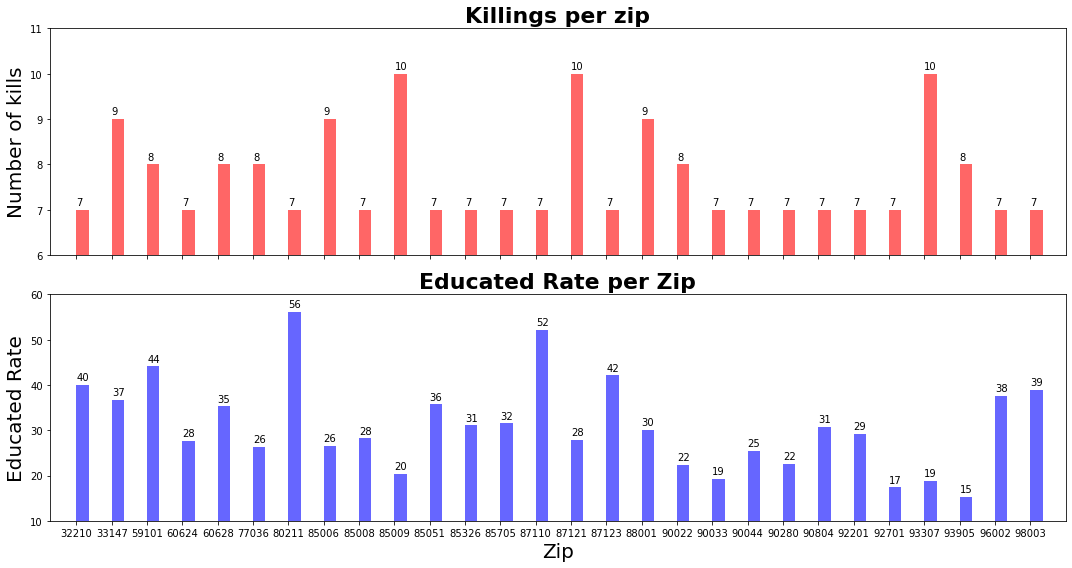

In [12]:
num_kills = gt_6_df['Kill_cnt']
educated_rate = gt_6_df['Educated%']
per_zip = gt_6_df['Zip']

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15,8))
ax1.bar(per_zip, num_kills, color='r', alpha=0.6, align='edge', width=0.35)
ax2.bar(per_zip, educated_rate, color='b', alpha=0.6, align='edge', width=0.35)

ax1.set_ylim(6, max(num_kills)+1)
ax1.set_title('Killings per zip', fontweight="bold", size=22)
ax1.set_ylabel('Number of kills', fontsize = 20)

ax2.set_ylim(10, max(educated_rate)+4)
ax2.set_title('Educated Rate per Zip', fontweight="bold", size=22)
ax2.set_xlabel('Zip', fontsize = 20)
ax2.set_ylabel('Educated Rate', fontsize = 20)

for p in ax1.patches:
    percentage ='{:,.0f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()
    y=p.get_y()+height+0.1
    ax1.annotate(percentage,(x,y))

for p in ax2.patches:
    percentage ='{:,.0f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()
    y=p.get_y()+height+1
    ax2.annotate(percentage,(x,y))

plt.xlim(-0.75, len(per_zip))
plt.tight_layout()
plt.show()


In [13]:
# This function is used for plotting linear regression based on Zip, City, and State
def plot_linear_reg(df, title, text_coordinates):
    x_values = df['Educated%']
    y_values = df['Kill_cnt']
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.title(title)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Education")
    plt.ylabel('number of killings')
    print(f"The r-squared is: {rvalue}")
    plt.show()

The r-squared is: -0.3155858278815105


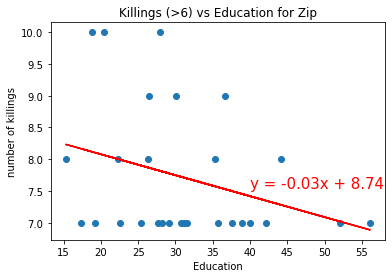

In [14]:
plot_linear_reg(gt_6_df, 'Killings (>6) vs Education for Zip', (40, 7.55))

The r-squared is: -0.24492667790448708


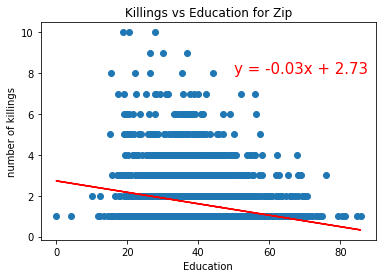

In [15]:
plot_linear_reg(zip_cnt_df, 'Killings vs Education for Zip', (50, 8))

In [16]:
State_grp = ed_by_zip_df.groupby('State').size().to_frame('Kill_cnt')
State_grp_df = pd.DataFrame(State_grp).reset_index()
State_grp_df.head()

,State,Kill_cnt
0,AK,40
1,AL,138
2,AR,103
3,AZ,341
4,CA,1181


In [17]:
st_cnt_df = pd.merge(State_grp_df, ed_by_zip_df, how='left', on=['State', 'State'])
st_cnt_df.head()

,State,Kill_cnt,Zip,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%,City
0,AK,40,72204,19.7,2.8,4.2,8.3,2.9,0.4,0.3,38.6,Little Rock
1,AK,40,99501,11.7,5.2,6.1,15.1,5.2,2.4,1.2,46.9,Anchorage
2,AK,40,99501,11.7,5.2,6.1,15.1,5.2,2.4,1.2,46.9,Anchorage
3,AK,40,99501,11.7,5.2,6.1,15.1,5.2,2.4,1.2,46.9,Anchorage
4,AK,40,99501,11.7,5.2,6.1,15.1,5.2,2.4,1.2,46.9,Fairview


In [18]:
st_cnt_df = st_cnt_df.groupby('State').mean().reset_index()

In [19]:
st_cnt_df.head()

,State,Kill_cnt,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%
0,AK,40,14.827500,3.837500,5.350000,10.830000,4.185000,1.135000,0.660000,40.825000
1,AL,138,17.373913,4.024638,5.311594,9.587681,3.973188,1.050000,0.607971,41.928986
2,AR,103,18.724272,4.208738,4.071845,9.149515,3.659223,0.966019,0.711650,41.491262
3,AZ,341,13.700000,2.996188,5.074780,9.432551,3.939589,0.878006,0.656305,36.677419
4,CA,1181,13.144539,1.691194,4.859610,10.453429,3.878493,1.087722,0.699492,35.814479


In [46]:
ed_rate=go.Bar(x=st_cnt_df['State'],y=st_cnt_df['Educated%'],marker=dict(color='#444444'),name="educated")
num_kills=go.Bar(x=st_cnt_df['State'],y=st_cnt_df['Kill_cnt'],marker=dict(color='#adad3b'),name="killed")
data=[ed_rate, num_kills]

fig = go.Figure(data)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title="Education Rate VS Number Killed by State",title_x=0.5,xaxis=dict(title="State"),yaxis=dict(title="Number of Victims"),
                   barmode="group")
fig.show()

In [56]:
fig = make_subplots(rows=2, cols=1,subplot_titles=("Killed per State", "Educated Rate per State"), shared_xaxes=True)
fig.add_trace(go.Bar(
    x= st_cnt_df['State'], 
    y= st_cnt_df['Kill_cnt'],  
    text=st_cnt_df['Kill_cnt'],
            textposition='outside',
    marker_color="red",
    name="killed"
),row=1, col=1)

fig.add_trace(go.Bar(
    x= st_cnt_df['State'], 
    y= round(st_cnt_df['Educated%'],0),  
    text=round(st_cnt_df['Educated%'],0),
            textposition='inside',
    marker_color="black",
    name="Educated %"
),row=2, col=1)

fig['layout']['yaxis2'].update(title='', range=[30, 50], autorange=False)
fig.update_layout(title_text='Educated Rate vs Killed Count',title_x=0.5, height=700)
fig.show()

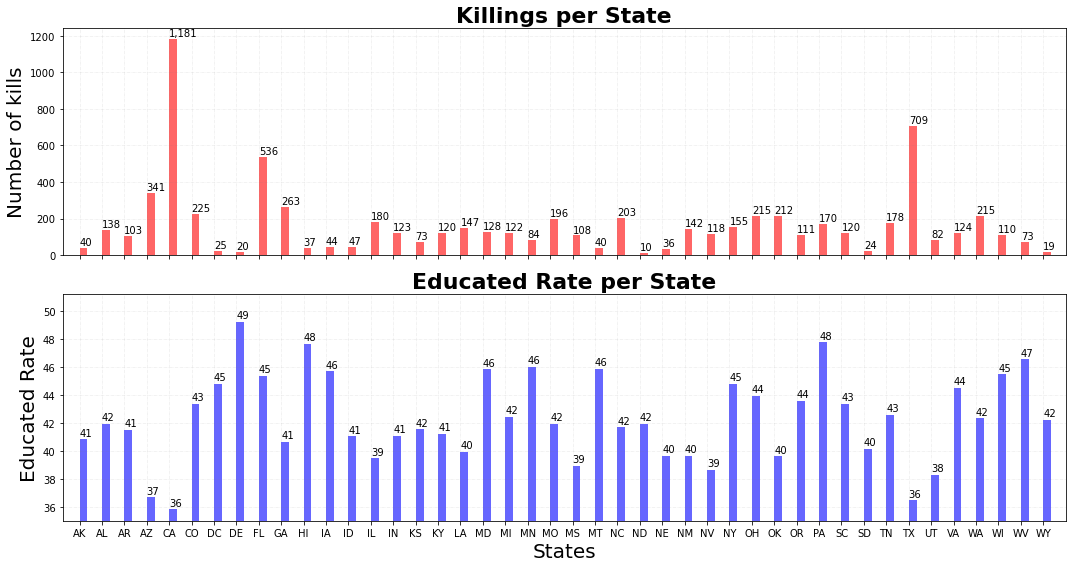

In [22]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15,8))
ax1.bar(per_state, num_kills, color='r', alpha=0.6, align='edge', width=0.35)
ax2.bar(per_state, educated_rate, color='b', alpha=0.6, align='edge', width=0.35)
ax1.set_title('Killings per State', fontweight="bold", size=22)
ax1.set_ylabel('Number of kills', fontsize = 20)

ax2.set_title('Educated Rate per State', fontweight="bold", size=22)
ax2.set_xlabel('States', fontsize = 20)
ax2.set_ylim(35, max(educated_rate)+2)
ax2.set_ylabel('Educated Rate', fontsize = 20)

ax1.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

ax2.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

for p in ax1.patches:
    percentage ='{:,.0f}'.format(p.get_height())
    #percentage = '{.0f:}'.format(p.get.height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()
    y=p.get_y()+height+15
    ax1.annotate(percentage,(x,y))

for p in ax2.patches:
    percentage ='{:,.0f}'.format(p.get_height())
    #percentage = '{.0f:}'.format(p.get.height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()
    y=p.get_y()+height+0.25
    ax2.annotate(percentage,(x,y))
    
plt.xlim(-0.75, len(per_state))
plt.tight_layout()
plt.show()

The r-squared is: -0.43546125652490836


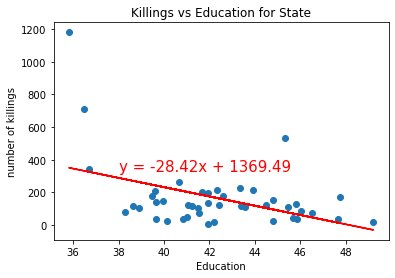

In [23]:
plot_linear_reg(st_cnt_df, 'Killings vs Education for State', (38, 330))

In [24]:
City_grp = ed_by_zip_df.groupby('City').size().to_frame('Kill_cnt')
City_grp_df = pd.DataFrame(City_grp).reset_index()
City_grp_df.head()

,City,Kill_cnt
0,Abbeville,1
1,Aberdeen,3
2,Abilene,3
3,Abingdon,2
4,Abita Springs,1


In [25]:
city_cnt_df = pd.merge(City_grp_df, ed_by_zip_df, how='inner', on=['City', 'City'])
city_cnt_df.head()

,City,Kill_cnt,Zip,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%,State
0,Abbeville,1,36310,22.4,5.0,5.6,5.1,3.5,0.5,0.2,42.3,AL
1,Aberdeen,3,28315,14.3,3.3,8.2,11.9,2.8,0.3,0.0,40.8,NC
2,Aberdeen,3,21001,19.6,2.6,4.7,9.5,3.9,0.2,0.9,41.4,MD
3,Aberdeen,3,98520,19.5,6.5,7.4,6.6,2.7,0.3,0.5,43.5,WA
4,Abilene,3,79601,11.3,10.0,2.3,6.5,2.7,0.4,0.9,34.1,TX


In [26]:
city_cnt_df = city_cnt_df.groupby('City').mean().reset_index()
city_cnt_df.head()

,City,Kill_cnt,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%
0,Abbeville,1,22.40,5.000000,5.600000,5.100000,3.500000,0.500000,0.200000,42.300000
1,Aberdeen,3,17.80,4.133333,6.766667,9.333333,3.133333,0.266667,0.466667,41.900000
2,Abilene,3,13.40,6.100000,4.233333,9.266667,3.333333,0.700000,0.700000,37.733333
3,Abingdon,2,16.25,2.800000,6.600000,16.300000,7.000000,1.800000,1.200000,51.950000
4,Abita Springs,1,18.20,4.400000,2.100000,15.400000,3.100000,1.300000,0.900000,45.400000


The r-squared is: -0.10649876701582954


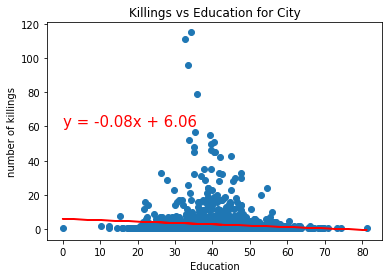

In [27]:
plot_linear_reg(city_cnt_df, 'Killings vs Education for City', (0, 60))

In [28]:
filt_gt_30 = city_cnt_df['Kill_cnt'] > 30
gt_30_df = city_cnt_df.loc[filt_gt_30]
gt_30_df

,City,Kill_cnt,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%
25,Albuquerque,51,13.837255,3.323529,5.078431,10.019608,5.627451,1.274510,1.249020,40.409804
107,Austin,33,9.909091,1.827273,3.378788,19.736364,8.445455,2.572727,1.690909,47.560606
120,Bakersfield,33,13.660606,2.312121,3.533333,4.530303,1.563636,0.445455,0.300000,26.345455
123,Baltimore,33,17.269697,3.581818,3.236364,9.512121,5.260606,1.775758,1.103030,41.739394
417,Chicago,79,15.215190,2.326582,3.929114,8.621519,4.073418,0.953165,0.630380,35.749367
495,Columbus,50,17.474000,3.420000,4.222000,9.462000,3.452000,0.876000,0.610000,39.516000
569,Dallas,52,13.975000,2.638462,2.911538,9.194231,3.315385,1.273077,0.536538,33.844231
612,Denver,43,10.890698,3.016279,3.734884,17.520930,6.834884,1.976744,1.004651,44.979070
839,Fort Worth,32,13.543750,3.203125,3.618750,9.437500,3.859375,0.893750,0.521875,35.078125
1123,Houston,96,13.160417,2.130208,2.911458,9.440625,3.730208,1.279167,0.894792,33.546875


The r-squared is: -0.39856017762497264


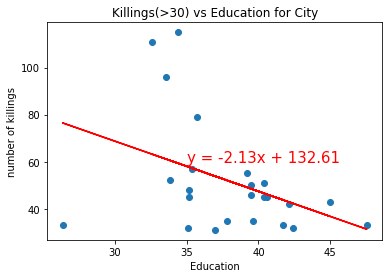

In [29]:
plot_linear_reg(gt_30_df, 'Killings(>30) vs Education for City', (35, 60))

In [30]:
lat_lng_df = pd.read_csv('us-zip-code-latitude-and-longitude.csv', dtype={'Zip':object})
lat_lng_df.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,71937,Cove,AR,34.398483,-94.39398,-6,1,34.398483
1,72044,Edgemont,AR,35.624351,-92.16056,-6,1,35.624351
2,56171,Sherburn,MN,43.660847,-94.74357,-6,1,43.660847
3,49430,Lamont,MI,43.010337,-85.89754,-5,1,43.010337
4,52585,Richland,IA,41.194129,-91.98027,-6,1,41.194129


In [31]:
lat_lng_df = lat_lng_df[['Zip', 'Latitude', 'Longitude']]
lat_lng_df.head()

,Zip,Latitude,Longitude
0,71937,34.398483,-94.39398
1,72044,35.624351,-92.16056
2,56171,43.660847,-94.74357
3,49430,43.010337,-85.89754
4,52585,41.194129,-91.98027


In [32]:
lat_lng_df.dtypes

Zip           object
Latitude     float64
Longitude    float64
dtype: object

In [33]:
# merge the dataframes to find the ralationship between killings and education
ed_kills_ll_df = pd.merge(ed_by_zip_df, lat_lng_df, how='inner', on=['Zip', 'Zip'])
ed_kills_ll_df.head()

,Zip,High_School%,GED%,Associates%,Bachelors%,Masters%,Professional%,Doctorate%,Educated%,State,City,Latitude,Longitude
0,16002,22.8,3.1,8.3,13.1,5.1,0.7,0.2,53.3,PA,Butler,40.818663,-79.86119
1,16053,22.6,2.2,9.8,15.3,5.2,1.2,0.6,56.9,PA,Renfrew,40.808934,-79.97811
2,16101,29.1,4.9,6.5,7.6,2.0,0.4,0.2,50.7,PA,New Castle,40.992023,-80.32747
3,16146,22.4,5.9,5.4,10.2,2.7,0.3,0.2,47.1,PA,Sharon,41.230106,-80.49896
4,16156,26.8,3.0,5.5,9.2,4.2,1.6,0.8,51.1,PA,Volant,41.097672,-80.23000


In [45]:
fig = go.Figure()
fig.add_trace(go.Choropleth(
    locations=st_cnt_df['State'],
    z=st_cnt_df['Kill_cnt'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=st_cnt_df['Educated%'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD",showscale = True
))

fig.update_layout(
    title_text='US Police Killings vs Education by State',
    title_x=0.5,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(150, 255, 255)')
)


fig.update_layout(
    template="plotly_dark",showlegend=False)
fig.show()